In [36]:
# Uncomment below line to extract dataset
# !unzip /content/hand-number-recognition.zip

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [38]:
data_dir = '../content/hand-number-recognition'  # Data folder

In [39]:
validation_split = 0.2  # 20% for validation

In [40]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=validation_split  # for random split
)

In [41]:
# Batch size and image size
batch_size = 16
img_size = (224, 224) #ResNet use this size

In [42]:
# Training generator (80% of data)
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True,
)

Found 82 images belonging to 2 classes.


In [43]:
# Validation generator (20% of data)
val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False,
)

Found 20 images belonging to 2 classes.


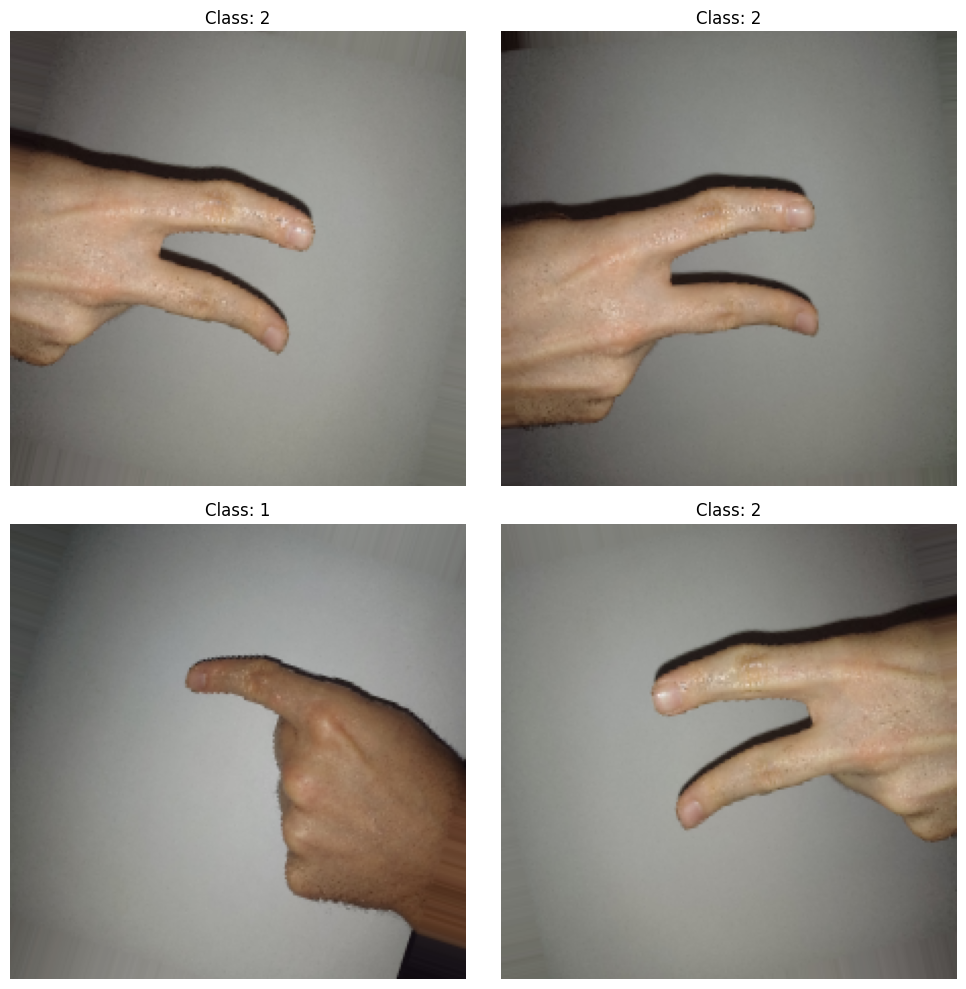

In [44]:
# To see if everyting is working

# Get a batch of augmented images
images, labels = next(train_generator)

# Get class names from the generator
class_names = list(train_generator.class_indices.keys())

# Create a 2x2 grid of images
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i])
    plt.title(f"Class: {class_names[int(labels[i])]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [45]:
input_shape=(224, 224, 3)

# **Creating Basic CNN**

In [46]:
model = models.Sequential()

# Conv Layer 1
model.add(layers.Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Conv Layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Conv Layer 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Conv Layer 4
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Conv Layer 5
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten
model.add(layers.Flatten())

# Dense Layer 1
model.add(layers.Dense(64, activation='relu'))

# Dense Layer 2 - Classifier
model.add(layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 10, 10, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │         204,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 593,345 (2.26 MB)

 Trainable params: 593,345 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

# Training CNN

In [48]:
model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'precision', 'recall'])

In [49]:
history = model.fit(
    train_generator,          # Training data generator
    epochs=15,                # Number of training epochs
    validation_data=val_generator  # Validation data generator
)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.4838 - loss: 0.7056 - precision: 0.4664 - recall: 0.6355 - val_accuracy: 0.5000 - val_loss: 0.7048 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.5708 - loss: 0.6833 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.6964 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.4178 - loss: 0.7017 - precision: 0.1429 - recall: 0.0574 - val_accuracy: 0.5000 - val_loss: 0.6924 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.5253 - loss: 0.6911 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.6939 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.5377 - loss: 0.6947 - precision: 0.5357 - recall: 0.1623 - val_accuracy: 0.75

# Results Of CNN

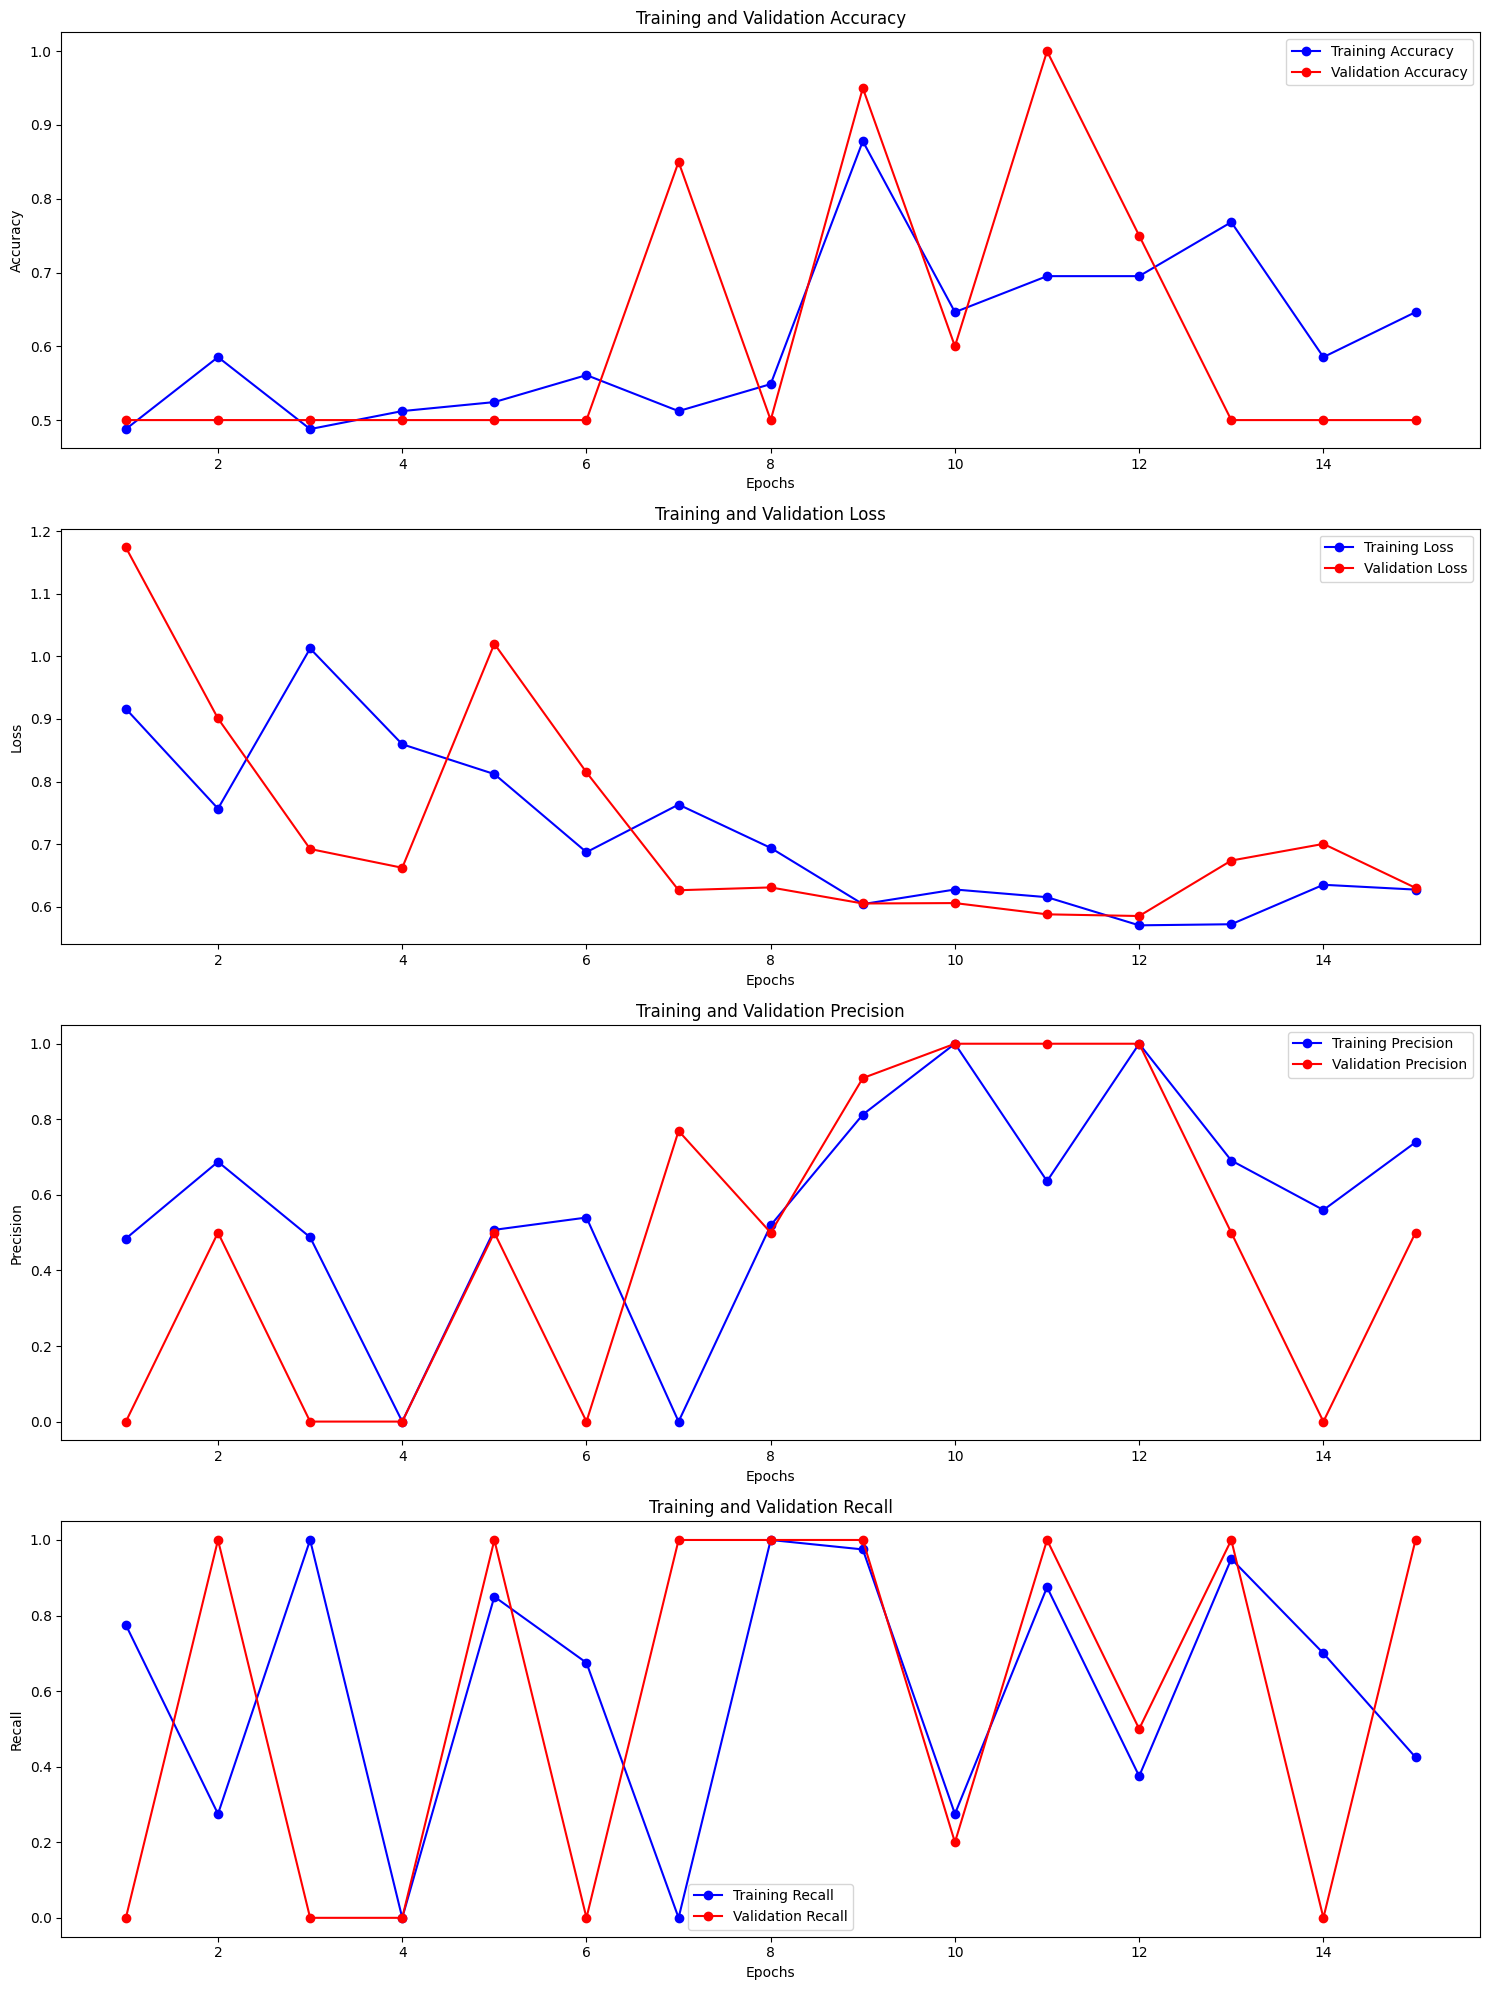

In [68]:
 # Extract metrics from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
precision = history.history['precision']
val_precision = history.history['val_precision']
recall = history.history['recall']
val_recall = history.history['val_recall']

epochs = range(1, len(acc) + 1)

# Create subplots
plt.figure(figsize=(15, 20))

# Plot Accuracy
plt.subplot(4, 1, 1)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


# Plot Loss
plt.subplot(4, 1, 2)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Precision
plt.subplot(4, 1, 3)
plt.plot(epochs, precision, 'bo-', label='Training Precision')
plt.plot(epochs, val_precision, 'ro-', label='Validation Precision')
plt.title('Training and Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()

# Plot Recall
plt.subplot(4, 1, 4)
plt.plot(epochs, recall, 'bo-', label='Training Recall')
plt.plot(epochs, val_recall, 'ro-', label='Validation Recall')
plt.title('Training and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()

plt.tight_layout()
plt.show()

# Using Pretrained Model (ResNet50)

In [51]:
pretrained_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
pretrained_model.trainable = False

pretrained_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

# Adding Extra Layers to Pretrained model

In [52]:
global_average_layer = layers.GlobalAveragePooling2D() # Pooling layer

prediction_layer = layers.Dense(1, activation='sigmoid')  # Output layer for binary classification

In [53]:
model = tf.keras.Sequential([
  pretrained_model,
  global_average_layer,
  prediction_layer
])

In [54]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,589,761 (89.99 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [55]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy', 'precision', 'recall'])

In [56]:
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator
)

Epoch 1/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 44s 5s/step - accuracy: 0.5550 - loss: 0.8626 - precision: 0.5536 - recall: 0.9064 - val_accuracy: 0.5000 - val_loss: 1.1739 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.5917 - loss: 0.8599 - precision: 0.1964 - recall: 0.0786 - val_accuracy: 0.5000 - val_loss: 0.9007 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.5089 - loss: 0.9992 - precision: 0.5089 - recall: 1.0000 - val_accuracy: 0.5000 - val_loss: 0.6922 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.5577 - loss: 0.7623 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.6622 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.5431 - loss: 0.7220 - precision: 0.5675 - recall: 0.6738 - val_accuracy: 0.5000 - 

# Results of ResNet50

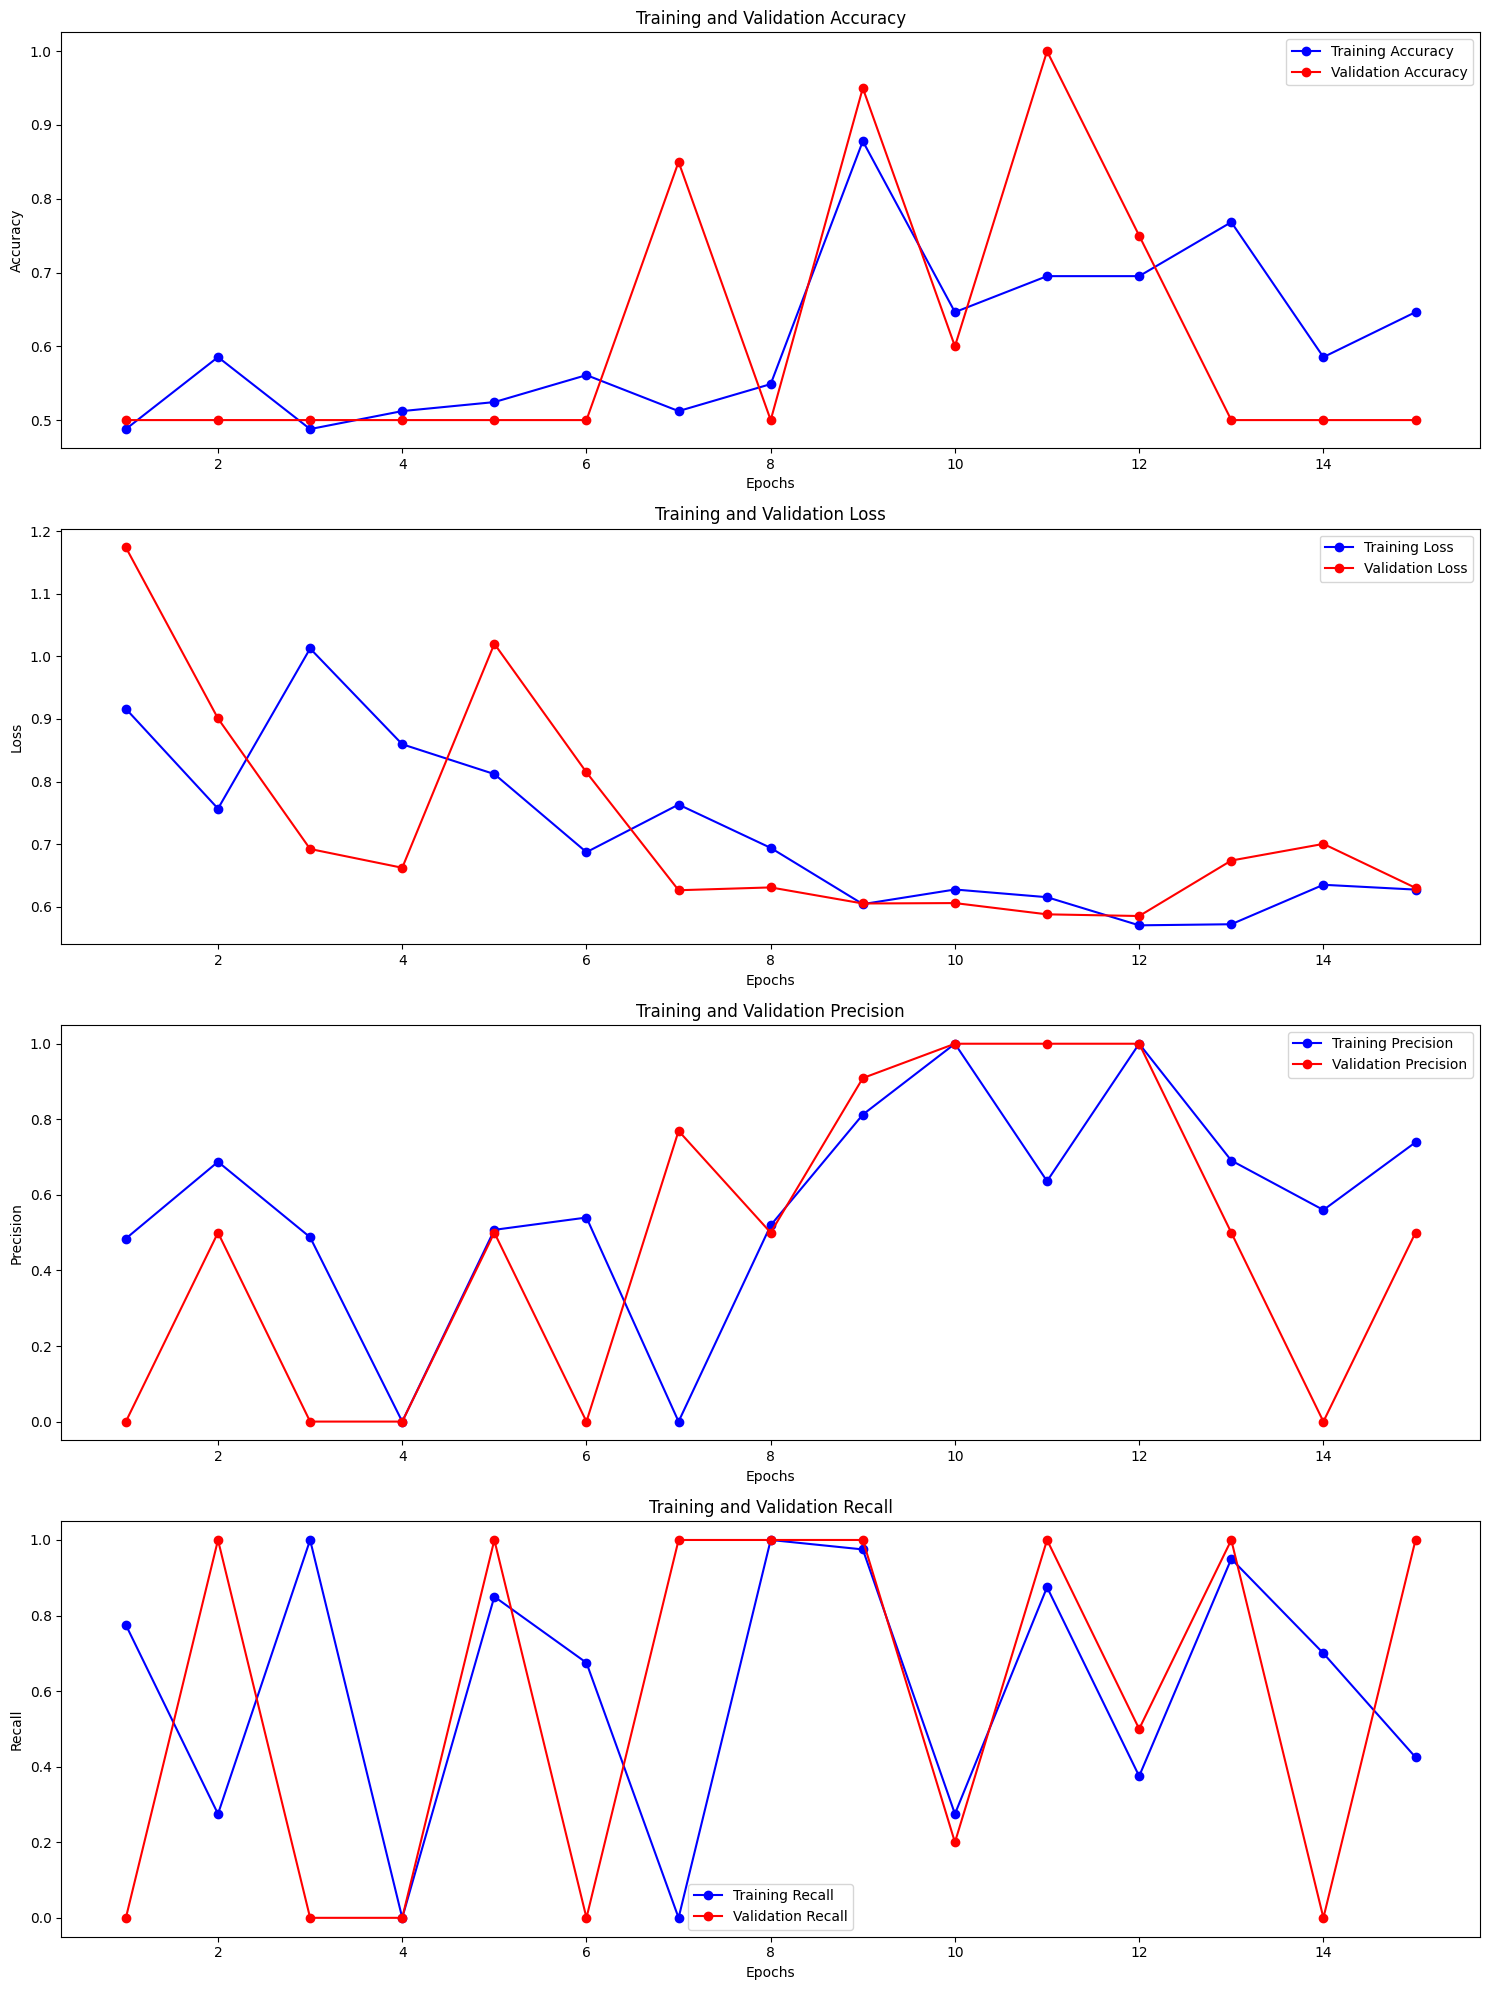

In [69]:
 # Extract metrics from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
precision = history.history['precision']
val_precision = history.history['val_precision']
recall = history.history['recall']
val_recall = history.history['val_recall']

epochs = range(1, len(acc) + 1)

# Create subplots
plt.figure(figsize=(15, 20))

# Plot Accuracy
plt.subplot(4, 1, 1)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('accuracy-resnet.png', dpi=300, bbox_inches='tight')


# Plot Loss
plt.subplot(4, 1, 2)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss-resnet.png', dpi=300, bbox_inches='tight')



# Plot Precision
plt.subplot(4, 1, 3)
plt.plot(epochs, precision, 'bo-', label='Training Precision')
plt.plot(epochs, val_precision, 'ro-', label='Validation Precision')
plt.title('Training and Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.savefig('precision-resnet.png', dpi=300, bbox_inches='tight')


# Plot Recall
plt.subplot(4, 1, 4)
plt.plot(epochs, recall, 'bo-', label='Training Recall')
plt.plot(epochs, val_recall, 'ro-', label='Validation Recall')
plt.title('Training and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.savefig('recall-resnet.png', dpi=300, bbox_inches='tight')


plt.tight_layout()
plt.show()

# Testing

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


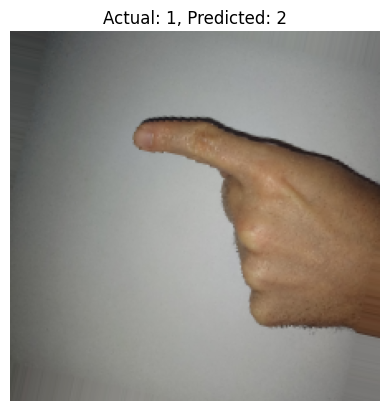

In [67]:
# Get the total number of images in the validation generator
total_images = val_generator.samples

# Randomly select an index
random_index = np.random.randint(0, total_images)

# Get the corresponding batch index and image index within the batch
batch_size = val_generator.batch_size
batch_index = random_index // batch_size
image_index_in_batch = random_index % batch_size

# Reset the generator and fetch the selected batch
val_generator.reset()  # Reset ensures consistent indexing
for i, (images, labels) in enumerate(val_generator):
    if i == batch_index:
        selected_image = images[image_index_in_batch]
        actual_label = labels[image_index_in_batch]
        break

# Predict using the model
selected_image_batch = np.expand_dims(selected_image, axis=0)  # Expand to match batch size
prediction = model.predict(selected_image_batch)[0]

# Display the image with the prediction and actual label
plt.imshow(selected_image)
plt.axis('off')

if val_generator.class_mode == 'binary':
    predicted_label = 1 if prediction > 0.5 else 0
    plt.title(f"Actual: {int(actual_label+1)}, Predicted: {predicted_label+1}")
else:  # For multi-class classification
    predicted_label = np.argmax(prediction)
    plt.title(f"Actual: {int(actual_label+1)}, Predicted: {predicted_label+1}")

plt.show()